**Case study - Cancer Detection**

Objective:
Using historical data about patients who were diagnosed with cancer, enable the doctors to confidently differentiate malignant cases from benign given the independent attributes. Prepared the data using KNN imputer and create the model.italicized text


*USED SVM and KNN for analysis and prediction *

Dataset

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/bc2-1.csv')
dataset = pd.DataFrame(data)
dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
dataset.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
dataset = dataset.replace('?',np.nan)

In [7]:
dataset.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
imputed = imputer.fit_transform(dataset)



In [9]:
dataset_imputed = pd.DataFrame(imputed, columns = dataset.columns)

In [10]:
dataset_imputed.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [11]:
dataset_imputed.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    float64
 1   ClumpThickness               699 non-null    float64
 2   Cell Size                    699 non-null    float64
 3   Cell Shape                   699 non-null    float64
 4   Marginal Adhesion            699 non-null    float64
 5   Single Epithelial Cell Size  699 non-null    float64
 6   Bare Nuclei                  699 non-null    float64
 7   Normal Nucleoli              699 non-null    float64
 8   Bland Chromatin              699 non-null    float64
 9   Mitoses                      699 non-null    float64
 10  Class                        699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


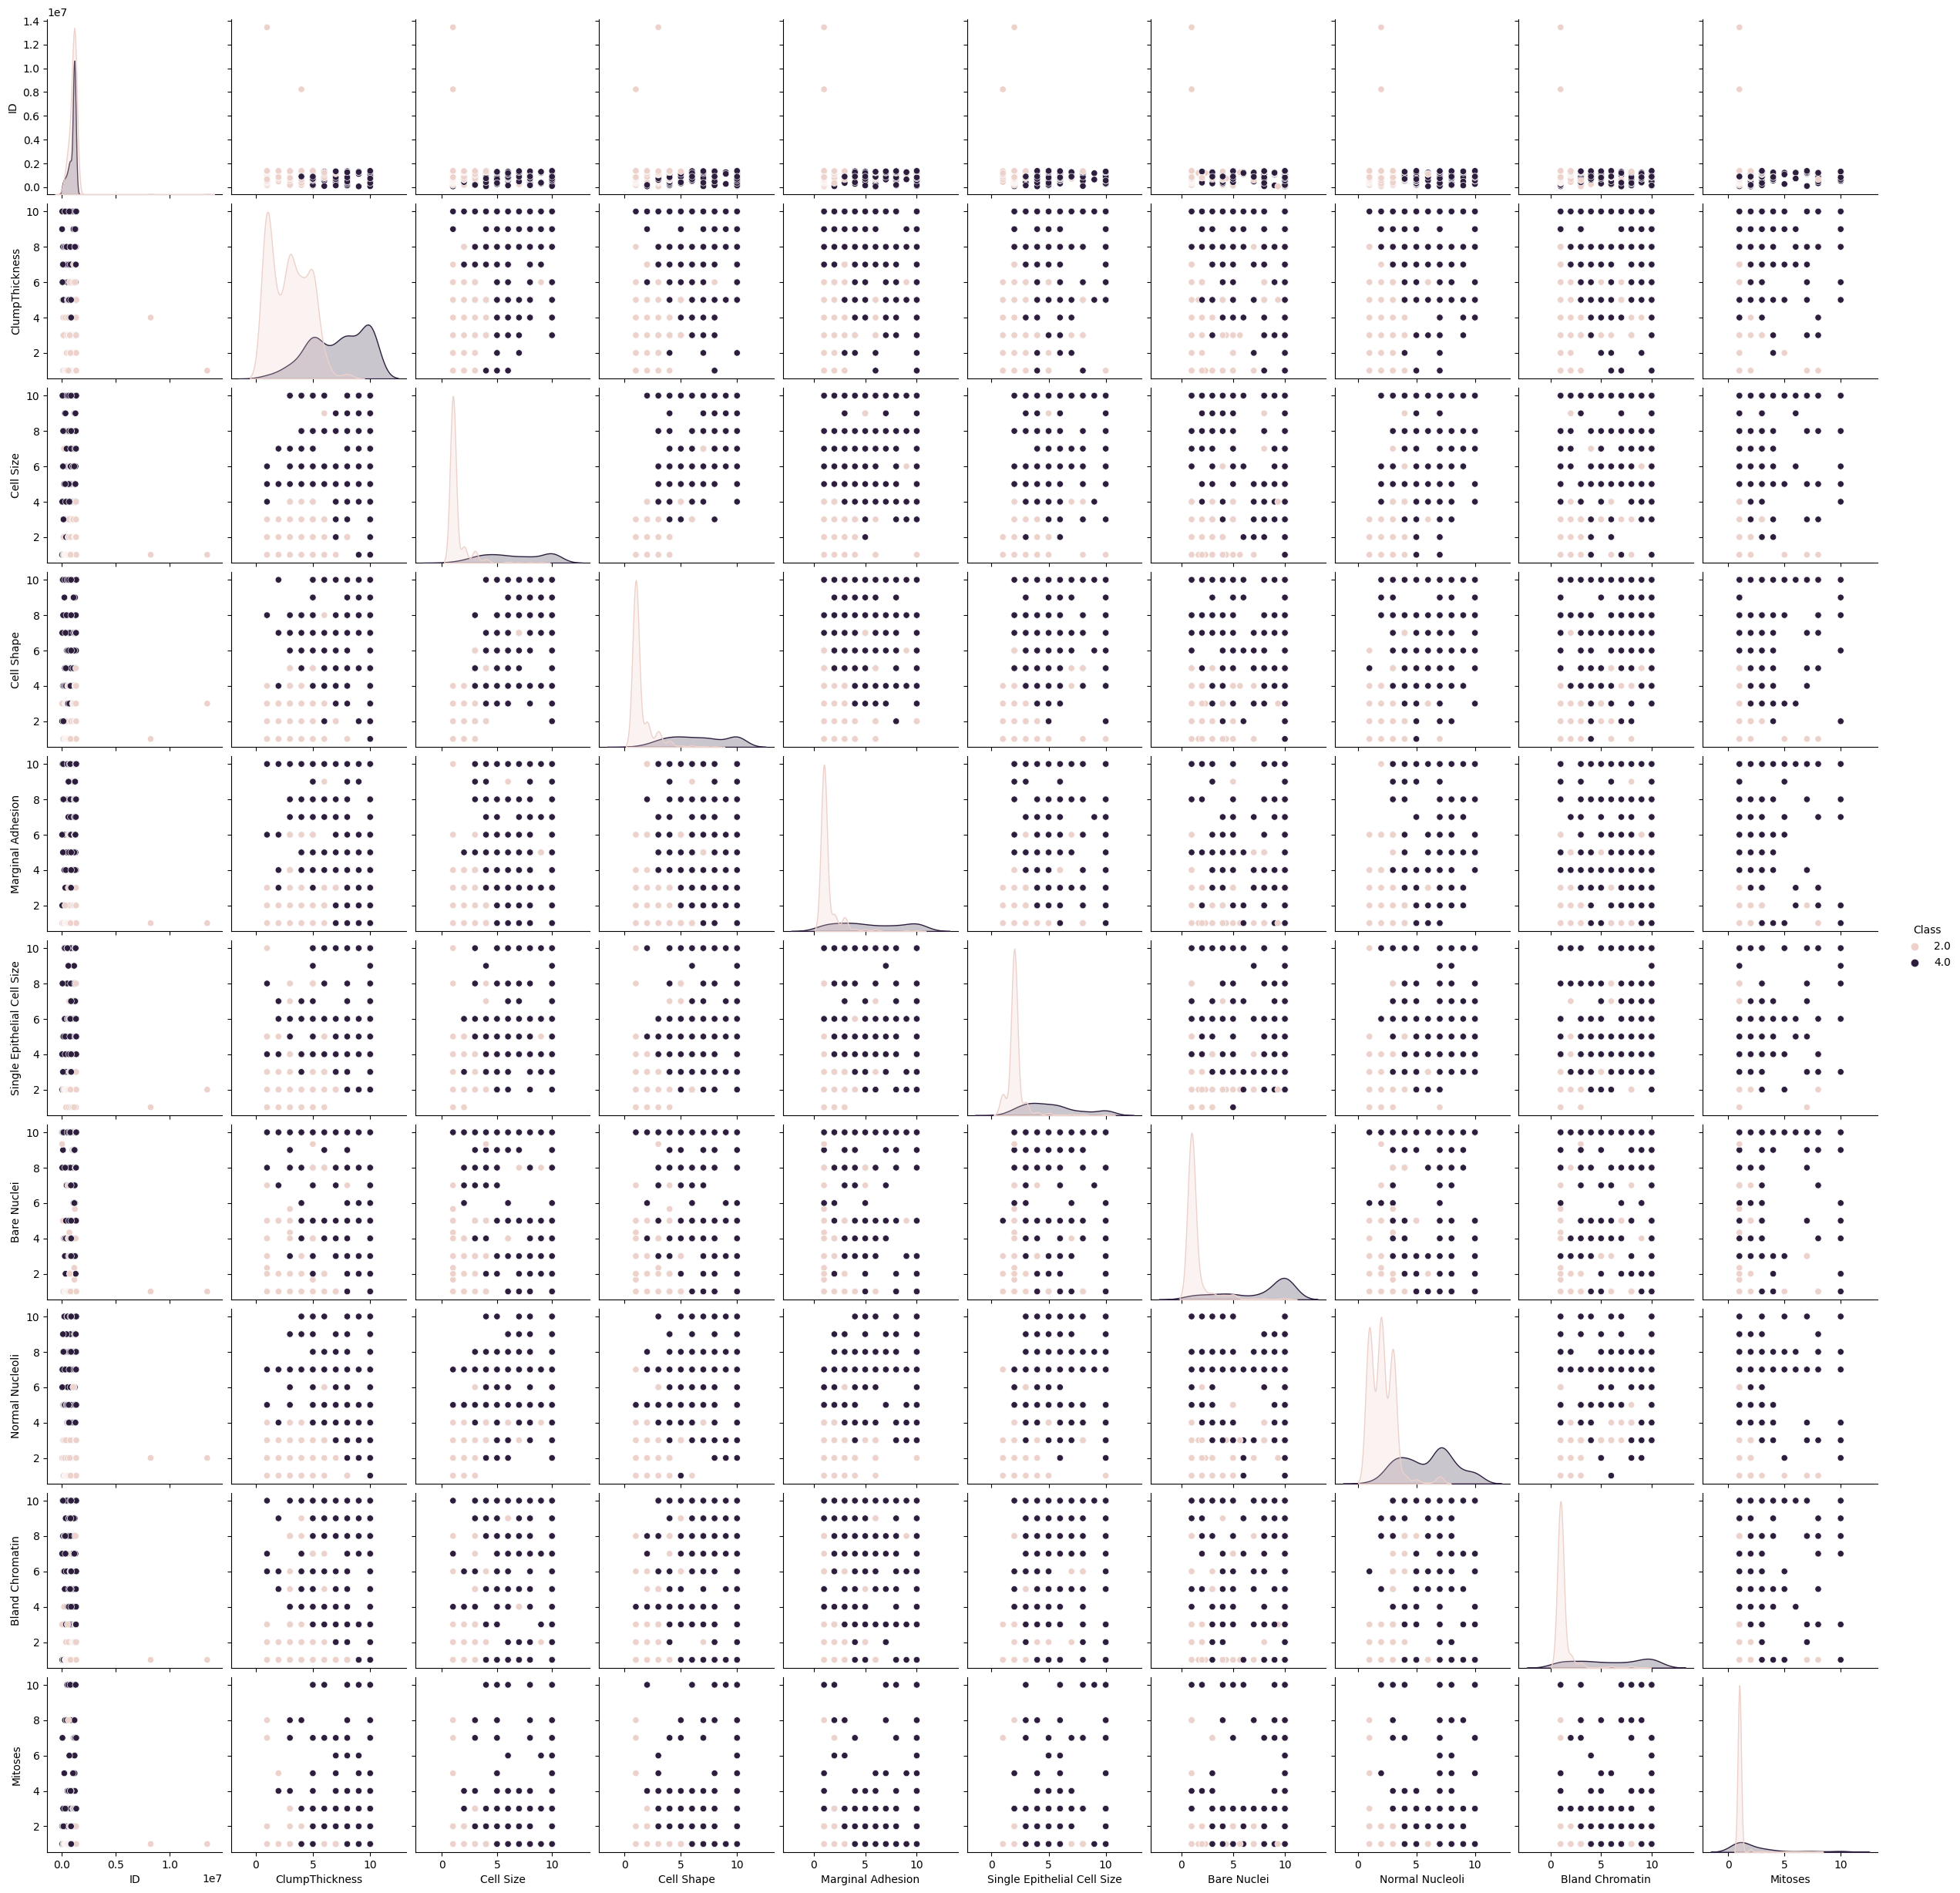

In [13]:
sns.pairplot(dataset_imputed, diag_kind = "kde", hue = "Class")

In [14]:
from sklearn.model_selection import train_test_split

#to calculate the accuracy score of the model

from sklearn.metrics import accuracy_score, confusion_matrix

target = dataset_imputed['Class']

features = dataset_imputed.drop(['ID',"Class"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

In [15]:
from sklearn.svm import SVC

#Building a support  vector machine on train data

svc_model = SVC(C = .1, kernel = 'linear', gamma = 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [16]:
prediction = svc_model.predict(X_test)

In [17]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

print("accuracy_score is : " )
print(accuracy_score(prediction,y_test))


0.9731663685152058
0.9642857142857143
accuracy_score is : 
0.9642857142857143


In [18]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[95  2]
 [ 3 40]]


In [19]:
# Building a Support Vector Machine on train data
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(X_train, y_train)

SVC()

In [20]:
print(svc_model_rbf.score(X_train, y_train))
print(svc_model_rbf.score(X_test, y_test))

0.9767441860465116
0.9714285714285714


In [21]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model_poly  = SVC(kernel='poly')
svc_model_poly.fit(X_train, y_train)

prediction_poly = svc_model_poly.predict(X_test)

print(svc_model_poly.score(X_train, y_train))
print(svc_model_poly.score(X_test, y_test))

0.9803220035778175
0.9571428571428572


In [22]:
svc_model_sig = SVC(kernel='sigmoid')
svc_model_sig.fit(X_train, y_train)

prediction_sig = svc_model.predict(X_test)

print(svc_model_sig.score(X_train, y_train))
print(svc_model_sig.score(X_test, y_test))

0.38998211091234347
0.44285714285714284


In [23]:
#using KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

#instantiate learning model k = 3

knn = KNeighborsClassifier(n_neighbors = 3)

#fitting the model

knn.fit(X_train, y_train)





KNeighborsClassifier(n_neighbors=3)

In [24]:
#predicting the output
prediction_knn = knn.predict(X_test)

In [25]:
#evulating accuracy
print(accuracy_score(y_test, prediction_knn))

0.9714285714285714


In [26]:
# instantiate learning model (k = 5)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

prediction_knn_5 = knn_5.predict(X_test)
print(accuracy_score(y_test, prediction_knn_5))


0.9785714285714285


In [27]:
# instantiate learning model (k = 5)
knn_9 = KNeighborsClassifier(n_neighbors=9)

knn_9.fit(X_train, y_train)

prediction_knn_9 = knn_9.predict(X_test)
print(accuracy_score(y_test, prediction_knn_9))

0.9642857142857143


In [28]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [29]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [30]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

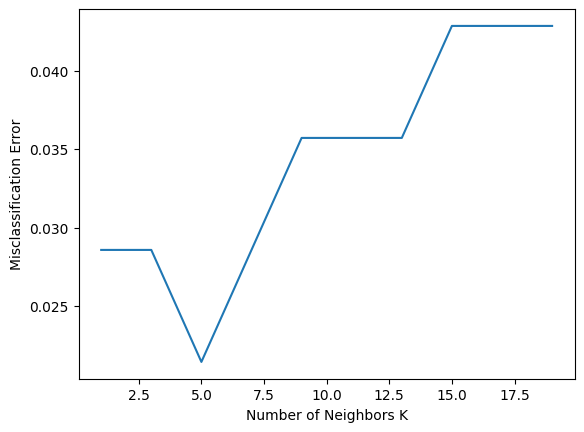

In [31]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [32]:
#Use k=5 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))


0.9785714285714285


In [33]:
#The final model has a good accuracy